In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
from pylab import rcParams
rcParams['figure.figsize']=12,7

In [3]:
df = pd.read_csv('monthly-milk-production-pounds-p.csv')

df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [4]:
df.columns = ['Month','Milk/cow']
df.head()

,Month,Milk/cow
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [5]:
df.isna().sum()

Month       0
Milk/cow    1
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df['Month'] = pd.to_datetime(df['Month'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 0 to 167
Data columns (total 2 columns):
Month       168 non-null datetime64[ns]
Milk/cow    168 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.9 KB


In [8]:
df.set_index('Month',inplace=True)
df.index

DatetimeIndex(['1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01',
               ...
               '1975-03-01', '1975-04-01', '1975-05-01', '1975-06-01',
               '1975-07-01', '1975-08-01', '1975-09-01', '1975-10-01',
               '1975-11-01', '1975-12-01'],
              dtype='datetime64[ns]', name='Month', length=168, freq=None)

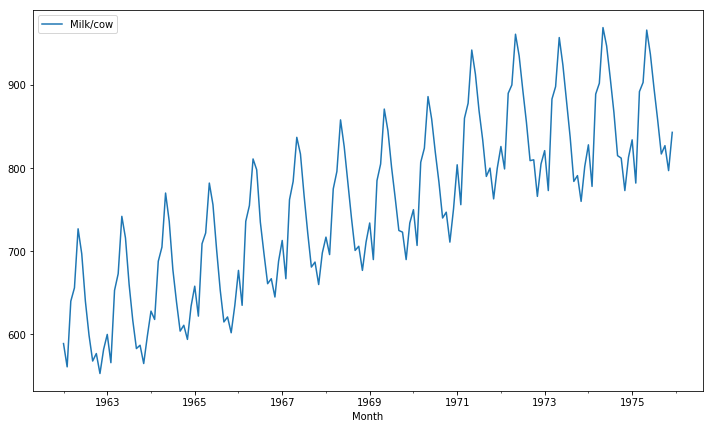

In [9]:
df.plot()

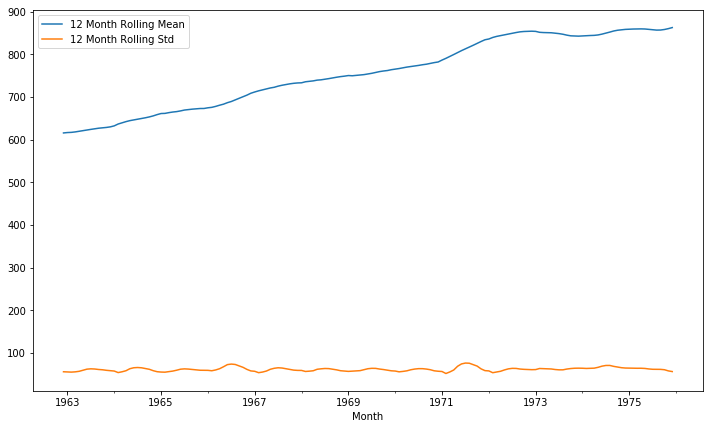

In [10]:
#checking for rolling mean / std test
ts = df['Milk/cow']
ts.rolling(12).mean().plot(label='12 Month Rolling Mean')
ts.rolling(12).std().plot(label='12 Month Rolling Std')
#ts.plot()
plt.legend(loc='best')

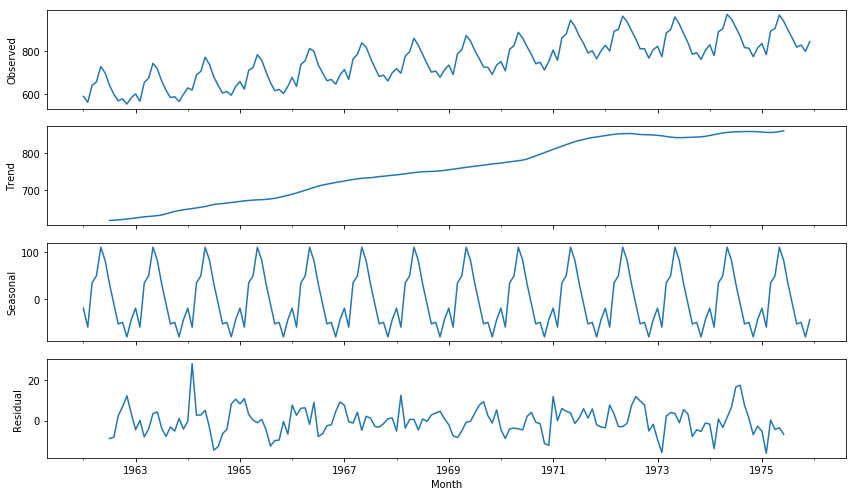

In [12]:
#will decompose to individual parts
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Milk/cow'])  
fig = decomposition.plot() 

In [13]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ts)
result

(-1.3038115874221312,
 0.6274267086030308,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1115.1730447395112)

In [14]:
#Mathematically testing stationarity by agumented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
#Creating function for later use
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")



In [15]:
#Check if the time series is Stationary or Not.
adf_check(df['Milk/cow'])

Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.3038115874221312
p-value : 0.6274267086030308
#Lags Used : 13
Number of Observations Used : 154
weak evidence against null hypothesis, time series is non-stationary 


In [16]:
from statsmodels.tsa.statespace.tools import diff
df['Milk First Difference']= diff(df['Milk/cow'],k_diff=1)

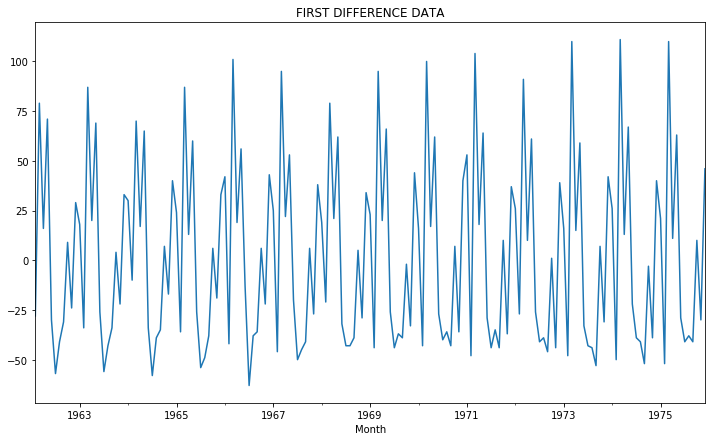

In [17]:
df['Milk First Difference'].plot(title="FIRST DIFFERENCE DATA").autoscale(axis='x',tight=True)


In [18]:
df.head()

,Milk/cow,Milk First Difference
Month,,
1962-01-01,589.0,NaN
1962-02-01,561.0,-28.0
1962-03-01,640.0,79.0
1962-04-01,656.0,16.0
1962-05-01,727.0,71.0


In [19]:
adf_check(df['Milk First Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -3.0549955586530615
p-value : 0.03006800400178639
#Lags Used : 14
Number of Observations Used : 152
strong evidence against the null hypothesis, reject the null hypothesis. Data is stationary


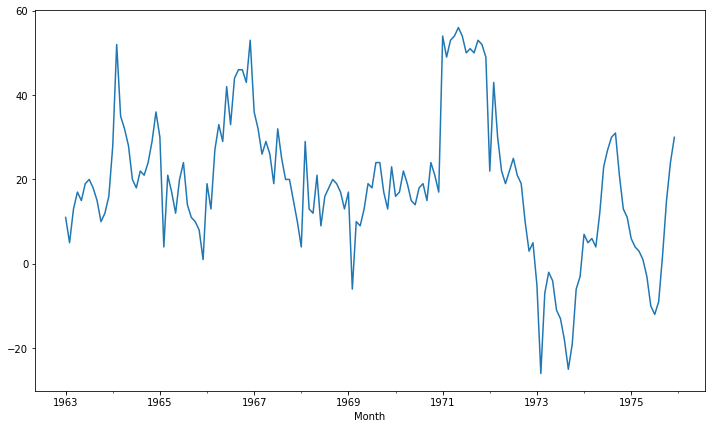

In [20]:
#Checking Seasonal diffrence
df['Seasonal Difference'] = df['Milk/cow'] - df['Milk/cow'].shift(12)
df['Seasonal Difference'].plot()

In [21]:
adf_check(df['Seasonal Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -2.335419314359398
p-value : 0.1607988052771135
#Lags Used : 12
Number of Observations Used : 143
weak evidence against null hypothesis, time series is non-stationary 


In [22]:
df.head(20)

,Milk/cow,Milk First Difference,Seasonal Difference
Month,,,
1962-01-01,589.0,NaN,NaN
1962-02-01,561.0,-28.0,NaN
1962-03-01,640.0,79.0,NaN
1962-04-01,656.0,16.0,NaN
1962-05-01,727.0,71.0,NaN
1962-06-01,697.0,-30.0,NaN
1962-07-01,640.0,-57.0,NaN
1962-08-01,599.0,-41.0,NaN
1962-09-01,568.0,-31.0,NaN


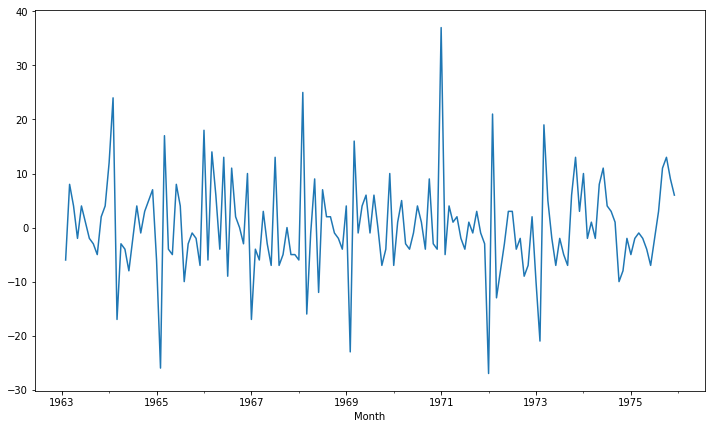

In [23]:
#Checking for seasonal first diffrence
df['Seasonal First Difference'] = df['Milk First Difference'] - df['Milk First Difference'].shift(12)
df['Seasonal First Difference'].plot()

In [24]:
adf_check(df['Seasonal First Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -5.038002274921986
p-value : 1.8654234318788024e-05
#Lags Used : 11
Number of Observations Used : 143
strong evidence against the null hypothesis, reject the null hypothesis. Data is stationary


C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


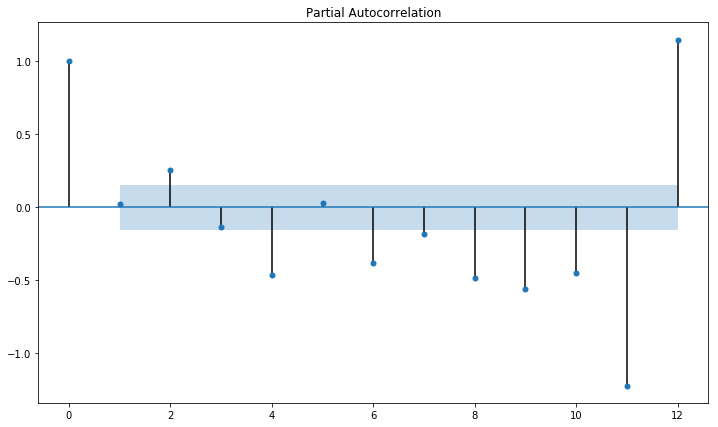

In [25]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig_first = plot_pacf(df["Milk First Difference"].dropna(),lags=12)

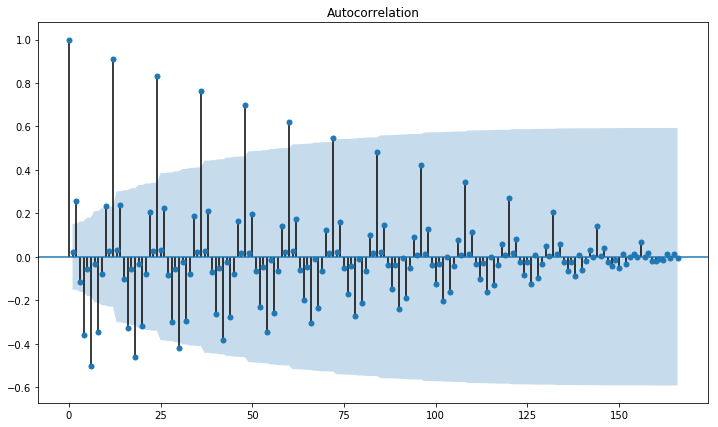

In [26]:
fig_first = plot_acf(df["Milk First Difference"].dropna())


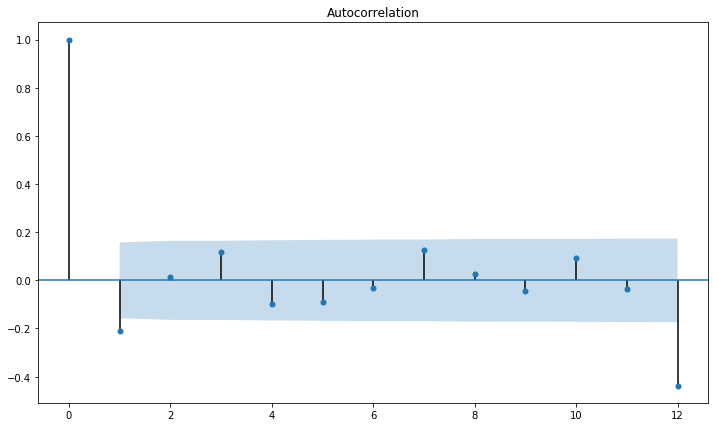

In [27]:
fig_seasonal_first = plot_acf(df["Seasonal First Difference"].dropna(),lags=12)


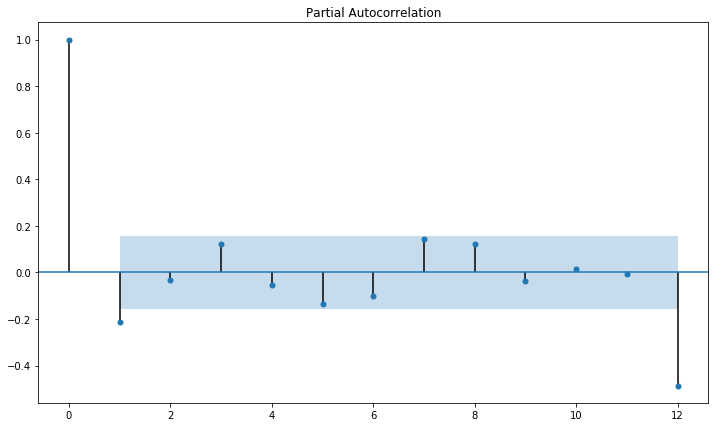

In [28]:
fig1 =plot_pacf(df['Seasonal First Difference'].dropna(),lags=12)


In [29]:
model = sm.tsa.statespace.SARIMAX(df['Milk/cow'],order=(1,1,0), seasonal_order=(2,2,2,12))
results = model.fit()

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [30]:
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                           Milk/cow   No. Observations:                  168
Model:             SARIMAX(1, 1, 0)x(2, 2, 2, 12)   Log Likelihood                -508.465
Date:                            Wed, 26 Aug 2020   AIC                           1028.930
Time:                                    00:51:29   BIC                           1046.707
Sample:                                01-01-1962   HQIC                          1036.154
                                     - 12-01-1975                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1943      0.080     -2.437      0.015      -0.351      -0.038
ar.S.L12       0.0297      0.388   

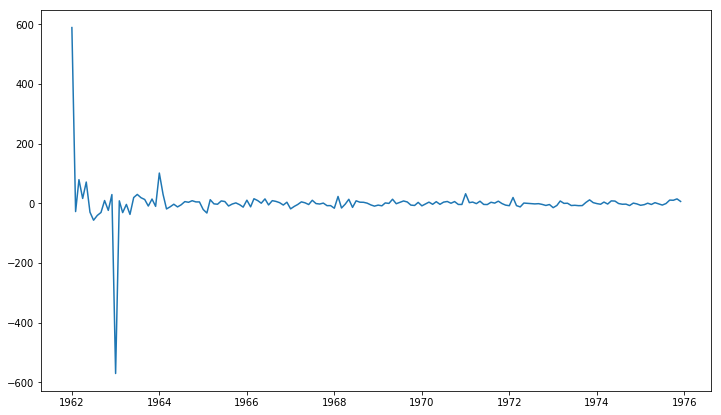

In [31]:
resid=pd.DataFrame(results.resid,columns=['Residual'])
plt.plot(resid['Residual'])

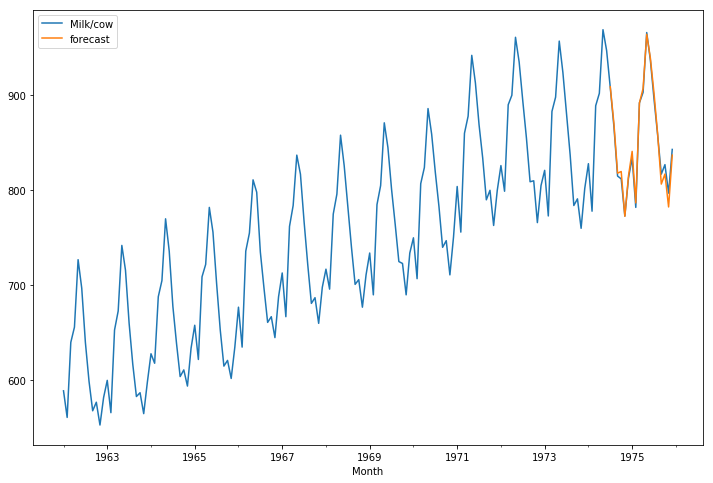

In [32]:
df['forecast'] = results.predict(start = 150, end= 168)  
df[['Milk/cow','forecast']].plot(figsize=(12,8))